# There are 8000 records which are less than 0
# there are 40 items = 0


In [148]:
import sqlite3
import datetime as dt

In [149]:
file = open("C:\\DataSets\\OnlineRetail2Sample.csv")
data1 = file.readlines()
data = data1[1:]

In [150]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

Opened database successfully


In [151]:
conn.execute('''CREATE TABLE RFMDM (
    InvoiceNo   CHAR (20),
    StockCode   CHAR (20),
    Quantity    INTEGER,
    DoP         DATE,
    UnitPrice   FLOAT,
    CustomerID  CHAR (30));''')
print ("Table created successfully")

#conn.close()

Table created successfully


In [152]:
for row in data:
    #iData = data[row].split(sep = ",")
    iData = row.split(sep = ",")
    #print(iData)
    InvoiceNo = iData[0]
    StockCode = iData[1]
    Quantity = iData[2]
    DoP = iData[3]
    UnitPrice = iData[4]
    CustomerID = iData[5]

    #print(InvoiceNo, StockCode, Quantity, DoP, UnitPrice, CustomerID)

    #sql = 'INSERT INTO RFMDM (InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID) \
    #      VALUES (' + 536365 , 71053, 6, \'12/1/2010\', 3.39, 17850)"

    sql = "INSERT INTO RFMDM (InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID) \
          VALUES (" + "\'" + InvoiceNo + "\',\'"+ StockCode + "\',"+ Quantity  + ','+ "\'" + DoP + "\'" +','+ UnitPrice +',' + CustomerID + " )"
    #print(sql)
    conn.execute(sql)
conn.commit()    
conn.close()
print("Commit successful")

Commit successful


In [153]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMDM limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('536365', '85123A', 6, '12/1/2010', 2.55, '17850'), ('536365', '71053', 6, '12/1/2010', 3.39, '17850'), ('536365', '84406B', 8, '12/1/2010', 2.75, '17850'), ('536365', '84029G', 6, '12/1/2010', 3.39, '17850'), ('536365', '84029E', 6, '12/1/2010', 3.39, '17850')]


#Run delete query in the table rfmdm
select count(*) from RFMDM
-- 406829

select count(*) from rfmdm where StockCode in ('POST', 'D', 'BANK CHARGES', 'C2', 'CRUK', 'DOT', 'M', 'PADS')

--1920

delete from rfmdm where StockCode in ('POST', 'D', 'BANK CHARGES', 'C2', 'CRUK', 'DOT', 'M', 'PADS')
select count(*) from RFMDM where Quantity<0

--8359 (2%)

delete from rfmdm where quantity <0

In [154]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

#conn.execute('''drop table rfmseg''')
conn.execute('''CREATE TABLE RFMSeg (
    CustomerID  CHAR (20),
    RDate   DATE,
    Frequency    INTEGER,
    Product INTEGER,
    TDate         DATE,
    Monetary   FLOAT)''')
print ("Table created successfully")

conn.close() 

Opened database successfully
Table created successfully


In [155]:
import pandas as pd

In [156]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("records added to dataframe successfully")
conn.close()

Opened database successfully
records added to dataframe successfully


In [157]:
rfmdm.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID
0,536365,85123A,6,12/1/2010,2.55,17850
1,536365,71053,6,12/1/2010,3.39,17850
2,536365,84406B,8,12/1/2010,2.75,17850
3,536365,84029G,6,12/1/2010,3.39,17850
4,536365,84029E,6,12/1/2010,3.39,17850


In [158]:
rfmdm.dtypes

InvoiceNo      object
StockCode      object
Quantity        int64
DoP            object
UnitPrice     float64
CustomerID     object
dtype: object

In [159]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select distinct(DoP) from RFMDM limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('12/1/2010',), ('12/2/2010',), ('12/3/2010',), ('12/5/2010',), ('12/6/2010',)]


In [160]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select count(*) from RFMDM")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[(396370,)]


In [161]:
rfmdm['DoP'] = pd.to_datetime(rfmdm['DoP'])
print("Converted successfully")

Converted successfully


In [162]:
rfmdm.dtypes

InvoiceNo             object
StockCode             object
Quantity               int64
DoP           datetime64[ns]
UnitPrice            float64
CustomerID            object
dtype: object

In [ ]:
#Fix datetime format issue

In [163]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmdm.to_sql('rfmdm_final',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [164]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select distinct(DoP) from RFMDM_final limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('2010-12-01 00:00:00',), ('2010-12-02 00:00:00',), ('2010-12-03 00:00:00',), ('2010-12-05 00:00:00',), ('2010-12-06 00:00:00',)]


In [ ]:
insert data into rfmseg table using sql
    INSERT INTO RFMSeg
       SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM_final
       group by customerid

In [165]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMSEG limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('12346', '2011-01-18 00:00:00', 1, 1, '2011-01-18 00:00:00', 77183.6), ('12347', '2011-12-07 00:00:00', 7, 103, '2010-12-07 00:00:00', 4309.999999999997), ('12348', '2011-09-25 00:00:00', 4, 21, '2010-12-16 00:00:00', 1437.24), ('12349', '2011-11-21 00:00:00', 1, 72, '2011-11-21 00:00:00', 1457.55), ('12350', '2011-02-02 00:00:00', 1, 16, '2011-02-02 00:00:00', 294.40000000000003)]


In [166]:
print(max(rfmdm['DoP']))

2011-12-09 00:00:00


In [167]:
print(min(rfmdm['DoP']))

2010-12-01 00:00:00


In [168]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table rfmseg \
            add column Recency INTEGER \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table rfmseg             add column Recency INTEGER         
Column added successfully


In [169]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table rfmseg \
            add column Tenure INTEGER \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table rfmseg             add column Tenure INTEGER         
Column added successfully


In [220]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmseg = pd.read_sql("select * from RFMSEG",conn)
print ("records added to dataframe rfmseg successfully")
conn.close()

Opened database successfully
records added to dataframe rfmseg successfully


In [221]:
rfmseg.head()
#print(rfmseg['Recency'])

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure
0,12346,2011-01-18 00:00:00,1,1,2011-01-18 00:00:00,77183.60,None,None
1,12347,2011-12-07 00:00:00,7,103,2010-12-07 00:00:00,4310.00,None,None
2,12348,2011-09-25 00:00:00,4,21,2010-12-16 00:00:00,1437.24,None,None
3,12349,2011-11-21 00:00:00,1,72,2011-11-21 00:00:00,1457.55,None,None
4,12350,2011-02-02 00:00:00,1,16,2011-02-02 00:00:00,294.40,None,None


In [222]:

NOW = dt.datetime(2011,12,15)
print(NOW)

2011-12-15 00:00:00


In [223]:
rfmseg['NOW'] = NOW
rfmseg.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,NOW
0,12346,2011-01-18 00:00:00,1,1,2011-01-18 00:00:00,77183.60,None,None,2011-12-15
1,12347,2011-12-07 00:00:00,7,103,2010-12-07 00:00:00,4310.00,None,None,2011-12-15
2,12348,2011-09-25 00:00:00,4,21,2010-12-16 00:00:00,1437.24,None,None,2011-12-15
3,12349,2011-11-21 00:00:00,1,72,2011-11-21 00:00:00,1457.55,None,None,2011-12-15
4,12350,2011-02-02 00:00:00,1,16,2011-02-02 00:00:00,294.40,None,None,2011-12-15


In [224]:
rfmseg['NOW'] = pd.to_datetime(rfmseg['NOW'])
rfmseg['TDate'] = pd.to_datetime(rfmseg['TDate'])
rfmseg['RDate'] = pd.to_datetime(rfmseg['RDate'])
rfmseg.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,NOW
0,12346,2011-01-18,1,1,2011-01-18,77183.60,None,None,2011-12-15
1,12347,2011-12-07,7,103,2010-12-07,4310.00,None,None,2011-12-15
2,12348,2011-09-25,4,21,2010-12-16,1437.24,None,None,2011-12-15
3,12349,2011-11-21,1,72,2011-11-21,1457.55,None,None,2011-12-15
4,12350,2011-02-02,1,16,2011-02-02,294.40,None,None,2011-12-15


In [225]:
rfmseg.dtypes

CustomerID            object
RDate         datetime64[ns]
Frequency              int64
Product                int64
TDate         datetime64[ns]
Monetary             float64
Recency               object
Tenure                object
NOW           datetime64[ns]
dtype: object

In [226]:
rfmseg['Recency'] = (rfmseg['NOW'] - rfmseg['RDate']).dt.days
rfmseg['Tenure'] = (rfmseg['NOW'] - rfmseg['TDate']).dt.days
rfmseg.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,NOW
0,12346,2011-01-18,1,1,2011-01-18,77183.60,331,331,2011-12-15
1,12347,2011-12-07,7,103,2010-12-07,4310.00,8,373,2011-12-15
2,12348,2011-09-25,4,21,2010-12-16,1437.24,81,364,2011-12-15
3,12349,2011-11-21,1,72,2011-11-21,1457.55,24,24,2011-12-15
4,12350,2011-02-02,1,16,2011-02-02,294.40,316,316,2011-12-15


In [227]:
del rfmseg['NOW']
rfmseg.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure
0,12346,2011-01-18,1,1,2011-01-18,77183.60,331,331
1,12347,2011-12-07,7,103,2010-12-07,4310.00,8,373
2,12348,2011-09-25,4,21,2010-12-16,1437.24,81,364
3,12349,2011-11-21,1,72,2011-11-21,1457.55,24,24
4,12350,2011-02-02,1,16,2011-02-02,294.40,316,316


In [228]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmseg.to_sql('rfmseg_final',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [229]:
rfmseg.describe()

,Frequency,Product,Monetary,Recency,Tenure
count,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000
mean,4.245675,61.413149,2021.007301,98.208535,228.785928
std,7.636337,85.304170,8906.526607,100.170816,117.867218
min,1.000000,1.000000,0.000000,6.000000,6.000000
25%,1.000000,16.000000,305.410000,23.000000,118.000000
50%,2.000000,35.000000,668.110000,56.000000,254.000000
75%,5.000000,77.000000,1631.475000,148.000000,332.000000
max,206.000000,1785.000000,279138.020000,379.000000,379.000000


In [230]:
rfmseg.shape

(4335, 8)

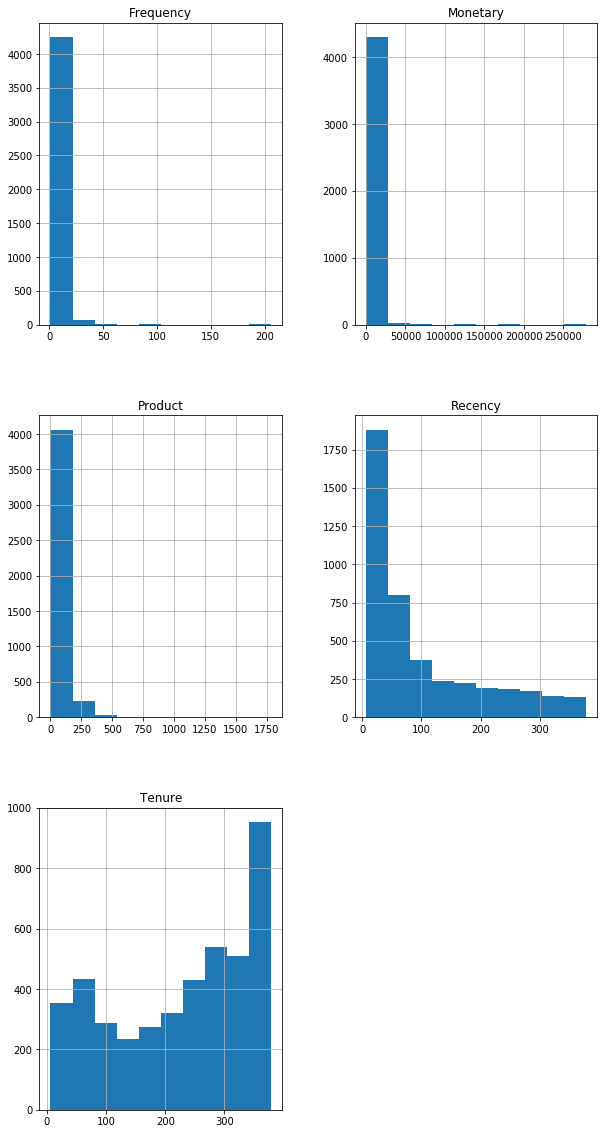

In [231]:
import matplotlib.pyplot as plt
rfmseg.hist(figsize = (10,20))
plt.show()

In [184]:
#plt.boxplot(rfmseg["Frequency"])
#plt.show()

In [185]:
#plt.boxplot(rfmseg["Monetary"])
#plt.show()

In [186]:
#plt.boxplot(rfmseg["Product"])
#plt.show()

In [187]:
#plt.boxplot(rfmseg["Recency"])
#plt.show()

In [188]:
#plt.boxplot(rfmseg["Tenure"])
#plt.show()

In [189]:
#import seaborn as sns
#sns.pairplot(rfmseg, hue = None, size=3)
#plt.show()

In [233]:
rfmseg.describe()

,Frequency,Product,Monetary,Recency,Tenure
count,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000
mean,4.245675,61.413149,2021.007301,98.208535,228.785928
std,7.636337,85.304170,8906.526607,100.170816,117.867218
min,1.000000,1.000000,0.000000,6.000000,6.000000
25%,1.000000,16.000000,305.410000,23.000000,118.000000
50%,2.000000,35.000000,668.110000,56.000000,254.000000
75%,5.000000,77.000000,1631.475000,148.000000,332.000000
max,206.000000,1785.000000,279138.020000,379.000000,379.000000


In [234]:
quantiles = rfmseg.quantile(q=[0.25,0.5,0.75])
quantiles

,Frequency,Product,Monetary,Recency,Tenure
0.25,1.0,16.0,305.410,23.0,118.0
0.50,2.0,35.0,668.110,56.0,254.0
0.75,5.0,77.0,1631.475,148.0,332.0


In [235]:
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 305.4100000000001,
  0.5: 668.1100000000002,
  0.75: 1631.4750000000004},
 'Product': {0.25: 16.0, 0.5: 35.0, 0.75: 77.0},
 'Recency': {0.25: 23.0, 0.5: 56.0, 0.75: 148.0},
 'Tenure': {0.25: 118.0, 0.5: 254.0, 0.75: 332.0}}

In [236]:
rfmSegmentation = rfmseg
rfmSegmentation.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure
0,12346,2011-01-18,1,1,2011-01-18,77183.60,331,331
1,12347,2011-12-07,7,103,2010-12-07,4310.00,8,373
2,12348,2011-09-25,4,21,2010-12-16,1437.24,81,364
3,12349,2011-11-21,1,72,2011-11-21,1457.55,24,24
4,12350,2011-02-02,1,16,2011-02-02,294.40,316,316


In [245]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [248]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [249]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [250]:
rfmSegmentation.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,12346,2011-01-18,1,1,2011-01-18,77183.60,331,331,1,1,4,114
1,12347,2011-12-07,7,103,2010-12-07,4310.00,8,373,4,4,4,444
2,12348,2011-09-25,4,21,2010-12-16,1437.24,81,364,2,3,3,233
3,12349,2011-11-21,1,72,2011-11-21,1457.55,24,24,3,1,3,313
4,12350,2011-02-02,1,16,2011-02-02,294.40,316,316,1,1,1,111
